In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [28]:
file_path = '/kaggle/input/automotive-vehicles-engine-health-dataset/engine_data.csv'
data = pd.read_csv(file_path)

In [29]:
# Data exploration
print(data.head()) 
print(data.info())  
print(data.describe())

   Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         700          2.493592      11.790927          3.178981   
1         876          2.941606      16.193866          2.464504   
2         520          2.961746       6.553147          1.064347   
3         473          3.707835      19.510172          3.727455   
4         619          5.672919      15.738871          2.052251   

   lub oil temp  Coolant temp  Engine Condition  
0     84.144163     81.632187                 1  
1     77.640934     82.445724                 0  
2     77.752266     79.645777                 1  
3     74.129907     71.774629                 1  
4     78.396989     87.000225                 0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  flo

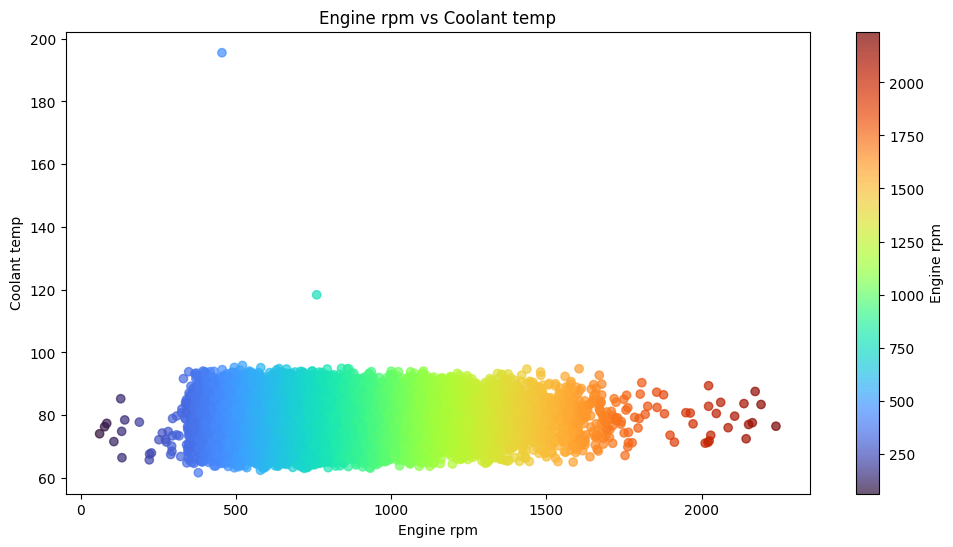

In [30]:
plt.figure(figsize =(12, 6))
scatter = plt.scatter(
    data["Engine rpm"],
    data["Coolant temp"],
    c = data["Engine rpm"],
    cmap = 'turbo',
    alpha = 0.7
)
plt.colorbar(scatter, label = 'Engine rpm')
plt.title("Engine rpm vs Coolant temp")
plt.xlabel("Engine rpm")
plt.ylabel("Coolant temp")
plt.show()

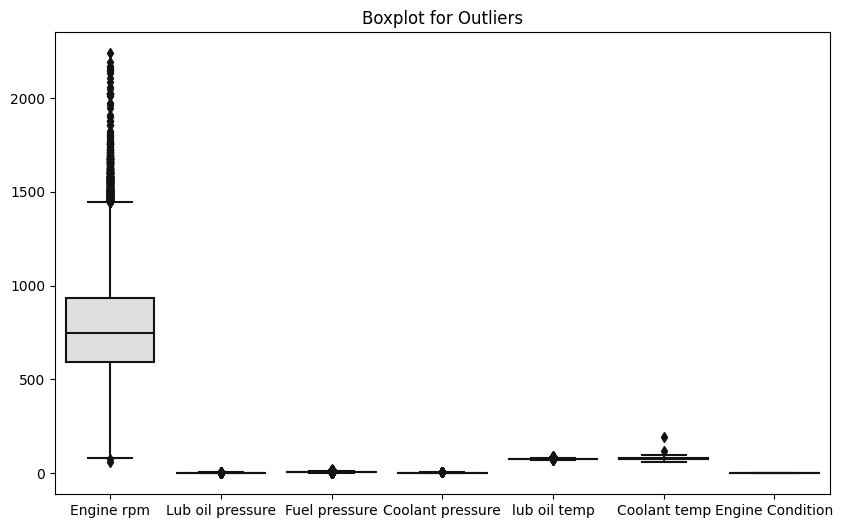

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, palette='binary')
plt.title("Boxplot for Outliers")
plt.show()


In [32]:
#split data 
X = data.drop(columns=['Engine Condition'])  # All columns except the target
y = data['Engine Condition']  # Target column

In [33]:
# Preprocessing: Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [34]:
# Define the model (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [35]:
# Predict on test data
y_pred = model.predict(X_test)

In [36]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.2223332224212951
Mean Absolute Error: 0.41956744305093424
R-squared: 0.04977931620614895


/tmp/ipykernel_36/2549481029.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')


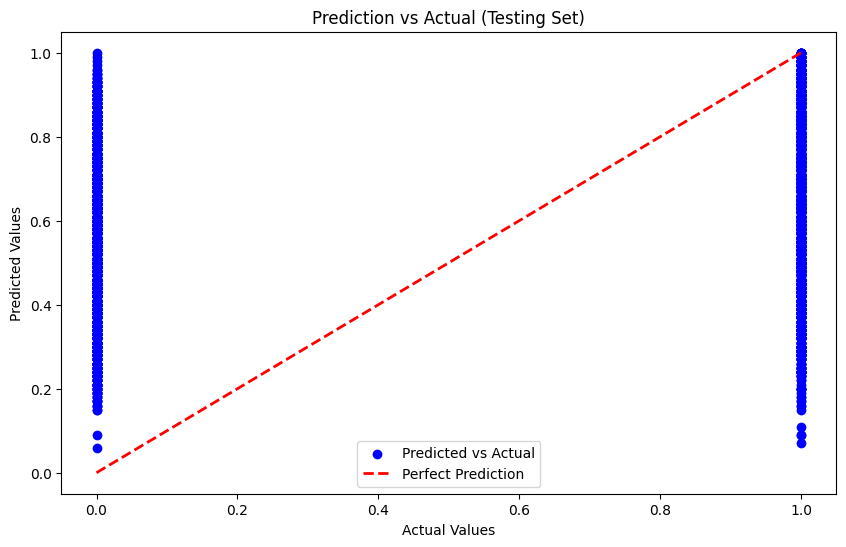

In [37]:

# Plotting training vs prediction results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction vs Actual (Testing Set)')
plt.legend()
plt.show()

Text(0.5, 0, 'Prediction Error')

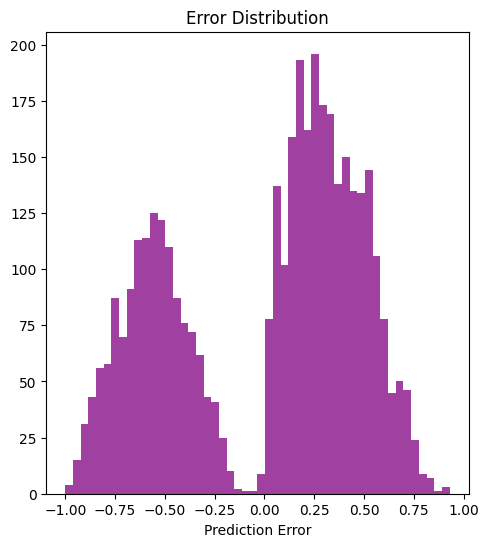

In [38]:
# Plotting error distribution and validation
plt.figure(figsize=(12, 6))

# Error distribution
plt.subplot(1, 2, 1)
plt.hist(y_test - y_pred, bins=50, color='purple', alpha=0.75)
plt.title('Error Distribution')
plt.xlabel('Prediction Error')

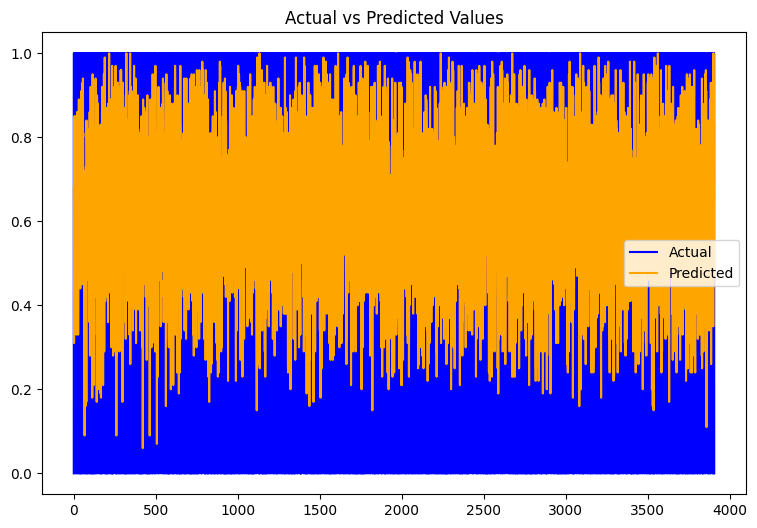

In [39]:
plt.figure(figsize=(20, 6)) 

# Create the subplot
plt.subplot(1, 2, 2)
plt.plot(range(len(y_test)), y_test, label='Actual', color='blue')
plt.plot(range(len(y_pred)), y_pred, label='Predicted', color='orange')
plt.title('Actual vs Predicted Values')
plt.legend()


plt.show()